<IPython.core.display.Javascript object>


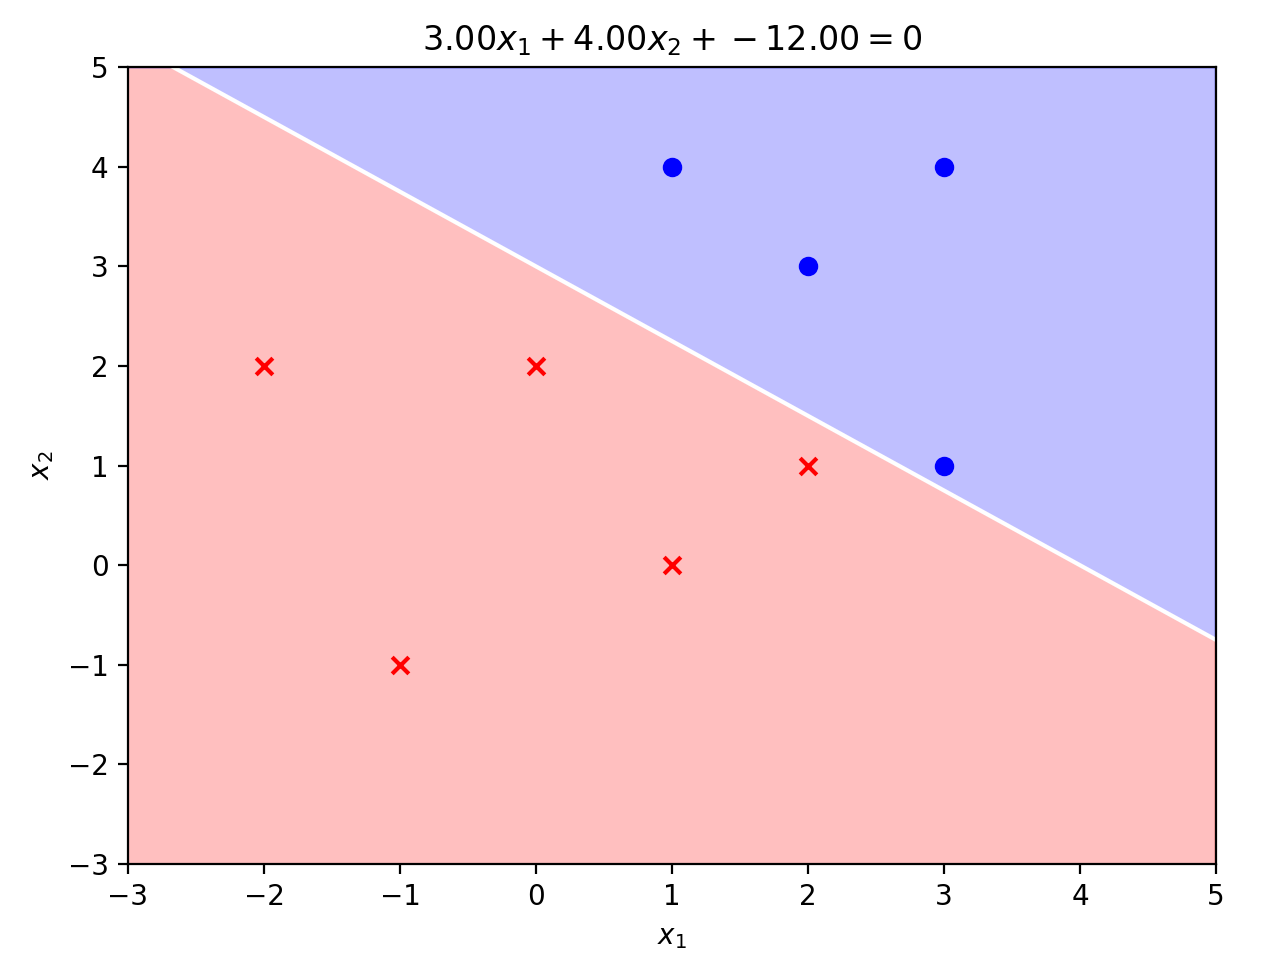

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import random

# 3 * X1 + 2 * X2 - 6 = 0
lr = 1
X = np.array([[2, 3], [3, 1], [1, 4], [3, 4], [2, 1], [-1, -1], [1, 0], [0, 2], [-2, 2]], dtype = np.int32)   
#X = np.array([(2, 1.7), (1.8, 1.8), (1.5, 1.5), (1.4, 1.8), (2, 1), (1.8, 1.2), (1.4, 2.2), (1.5, 1.3), (2, 2.3), (2.3, 2.2), (2.2, 2.4), (3, 2.5), (2.8, 2.7), (2.8, 2.1), (2.6, 2.5), (2.2, 2.8)], np.float32)
label = np.array([1, 1, 1, 1, -1, -1, -1, -1, -1], np.int32)
#label = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1], np.int32)
count = 0
done = False
#print(X[:,1])
def update(X, label, W):
    for [x1, x2], y in zip(X, label):
        w_x = W[0] * 1 + W[1] * x1 + W[2] * x2 
        if np.sign(w_x) != y:
            #print(x1,x2,y)
            W += lr * y * np.array([1, x1, x2], dtype = np.float32)
            return False
    return True

def draw(W):
    #plt.xlim(0.8, 3.2)
    #plt.ylim(0.8, 3.2)
    plt.xlim(-3, 5)
    plt.ylim(-3, 5)
    plt.scatter(X[:4, 0], X[:4, 1], marker = 'o', color = 'b')
    plt.scatter(X[4:, 0], X[4:, 1], marker = 'x', color = 'r')
    line_x1 = np.linspace(-5, 5, 10)
    line_x0 = np.ones(10) 
    if W[2] != 0:
        line_x2 = (-W[1] * line_x1 - W[0] * line_x0) / W[2]
        plt.plot(line_x1, line_x2, color = 'w')
        if W[1] >= 0:
            if W[1] / W[2] >= 0:
                plt.fill_between(line_x1, line_x2, -5, alpha = 0.25, color = 'r')
                plt.fill_between(line_x1, 5, line_x2, alpha = 0.25, color = 'b')
            else:
                plt.fill_between(line_x1, line_x2, -5, alpha = 0.25, color = 'b')
                plt.fill_between(line_x1, 5, line_x2, alpha = 0.25, color = 'r')
        else:
            if W[1] / W[2] >= 0:
                plt.fill_between(line_x1, line_x2, -5, alpha = 0.25, color = 'b')
                plt.fill_between(line_x1, 5, line_x2, alpha = 0.25, color = 'r')
            else:
                plt.fill_between(line_x1, line_x2, -5, alpha = 0.25, color = 'r')
                plt.fill_between(line_x1, 5, line_x2, alpha = 0.25, color = 'b')
    elif W[1] != 0:
        line_x1 = (-W[0] / W[1]) * np.ones(10)
        line_x2 = np.linspace(-5, 5, 10)
        plt.plot(line_x1, line_x2, color = 'w')
        if W[1] > 0:
            plt.fill_between(np.linspace(-W[0] / W[1], 5, 10), 5, -5, alpha = 0.25, color = 'b')
            plt.fill_between(np.linspace(-5, -W[0] / W[1], 10), 5, -5, alpha = 0.25, color = 'r')
        else:
            plt.fill_between(np.linspace(-W[0] / W[1], 5, 10), 5, -5, alpha = 0.25, color = 'r')
            plt.fill_between(np.linspace(-5, -W[0] / W[1], 10), 5, -5, alpha = 0.25, color = 'b')
    plt.title(r"{:.2f}$x_1 + {:.2f}x_2 + {:.2f} = 0$".format(W[1], W[2], W[0]))
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.93)
    plt.show()
    
W = np.array([0, 0, 0], dtype = np.float32)
draw(W)



In [136]:
plt.gcf().clear()
#while not done:
done = update(X, label, W)
draw(W)
if done:
    print("It took {} iterations to get a set of W: {}.".format(count, W))
else:
    count += 1

It took 82 iterations to get a set of W: [-12.   3.   4.].



$$Formula : 1*x_1 + 1*x_2 -3 =0$$

